# **ROBOTRADER**

* En este proyecto, se ha desarrollado una solución basada en el análisis técnico financiero utilizando la estrategia MACD (Moving Average Convergence Divergence) y un modelo de machine learning. La estrategia MACD es una técnica bien establecida en el análisis del mercado de valores, que permite identificar posibles cambios en la dirección de la tendencia del precio de las acciones. Utilizando esta estrategia como base, se ha implementado un modelo de machine learning que busca predecir los movimientos futuros del precio de las acciones de Apple Inc. (AAPL).

* El enfoque combina la robustez del análisis técnico con la capacidad predictiva de los modelos de machine learning, lo que permite tomar decisiones informadas en el mercado de valores(Compra, venta o mantener). Al utilizar el MACD como indicador clave y entrenar el modelo con datos históricos de precios de AAPL, se busca generar señales de trading precisas que ayuden a los inversores a anticipar los movimientos del mercado y optimizar sus estrategias de inversión.

* El uso del MACD para orientar las predicciones del modelo de Random Forest ayuda a cumplir con la solución del problema en un sistema de robo trading ayudando a identificar tendencias y cambios en la dirección de los precios de los activos. Esto permite al Random Forest tener una idea más clara de la dirección en la que se está moviendo el mercado.

* Señales de Compra y Venta: Al utilizar el MACD como característica de entrada para el modelo de Random Forest, el robo trader puede obtener señales claras sobre cuándo comprar o vender activos. Esto puede mejorar la eficacia de las decisiones de trading al centrarse en los puntos de inflexión clave del mercado.

* La razón por la que se eligió el MACD, es por su simplicidad y su efectividad como indicador ya que convierte indicadores que siguen tendencias y medias móviles en un oscilador de momentum, restando la media móvil más larga de la media móvil más corta. Como resultado, el MACD ofrece lo mejor de ambos mundos: seguimiento de tendencias y momentum. 

## ¿De qué manera el MACD mide el momentum?
La fórmula básica para el cálculo del MACD es la siguiente:
MACD = EMA(corto plazo) - EMA(largo plazo)

Donde la restar ambas medias móviles da como resultado una línea que oscila alrededor de 0 y que refleja los cambios en el impulso del precio. Cuando el MACD está por encima de cero, indica que la media móvil exponencial de corto plazo está por encima de la de largo plazo, lo que sugiere un impulso alcista. Por otro lado, cuando el MACD está por debajo de cero, indica que la media móvil exponencial de corto plazo está por debajo de la de largo plazo, lo que sugiere un impulso bajista.

Ahora bien, el EMA corto plazo que se utilizará es de 1 día, mientras que el de largo plazo es de 3 días. Estos días son los precios de cierre a esos días. Asimismo, un EMA de 4 días se grafica sobre la línea MACD y esta actua como línea de señal e identifica reversiones

La línea MACD oscila por encima y por debajo de la línea cero. Estos cruces indican que la EMA de 1 día ha cruzado la EMA de 3 días. La dirección, por supuesto, depende de la dirección del cruce de media móvil. MACD positivo indica que la EMA de 1 día está por encima de la EMA de 3 días. Los valores positivos aumentan a medida que la EMA más corta se aleja más de la EMA más larga. Esto significa que el momentum alcista está aumentando. Los valores MACD negativos indican que la EMA de 1 día está por debajo de la EMA de 3 días. Los valores negativos aumentan a medida que la EMA más corta diverge más por debajo de la EMA más larga. Esto significa que el momentum bajista está aumentando.

## ¿De qué manera se utlizará el indicador de MACD como herramienta de predicción?

Con las señales de cruces de línea, estas señales son la más común con el indicador de MACD. Y como anteriormente se explicó, el EMA de 9 días, será la línea de señal de la línea MACD. Como una media móvil del indicador, esta traza el MACD y de esa manera se hace más fácil detectar los cruces de MACD. Un cruce alcista ocurre cuando el MACD se vuelve hacia arriba y cruza encima de la línea de señal. Y un cruce bajista ocurre cuando el MACD se vuelve hacia abajo y cruza debajo de la línea de señal. 

Otra señal que se va a observar van a ser los cruces de la línea central. Através de esta señal se produce un cruce de línea central alcista cuando la línea MACD se mueve por encima de la línea cero para volverse positiva. Esto sucede cuando la EMA de 1 día del valor subyacente se mueve por encima de la EMA de 3 días. Se produce un cruce de línea central bajista cuando el MACD se mueve por debajo de la línea cero para volverse negativo. Esto sucede cuando la EMA de 1 día se mueve por debajo de la EMA de 3 días.

Los cruces de la línea central pueden durar unos días o unos meses, dependiendo de la fuerza de la tendencia. El MACD seguirá siendo positivo mientras haya una tendencia alcista sostenida. El MACD seguirá siendo negativo cuando haya una tendencia bajista sostenida.

In [1]:
#!pip install yfinance
#!pip install matplotlib
#!pip install seaborn
#!pip install c

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import  cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Definición del ticker, fecha de inicio y fecha de fin para la descarga de datos
ticker = 'AAPL'
start_date = "2021-01-4"
end_date = "2023-12-23"

# Descarga de datos históricos de precios de la acción de Apple (AAPL)
apple = yf.download(ticker, start = start_date,
                   end = end_date, progress = False)

In [4]:
# Cálculo de los retornos diarios de cierre de la acción de Apple
apple["Retornos"] = apple["Close"].pct_change()
apple.dropna(inplace = True) # Eliminación de filas con valores NaN
apple

,Open,High,Low,Close,Adj Close,Volume,Retornos
Date,,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572327,97664900,0.012364
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000,-0.033662
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200,0.034123
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200,0.008631
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.580109,100384500,-0.023249
...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,-0.008503
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,0.005360
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,-0.010714


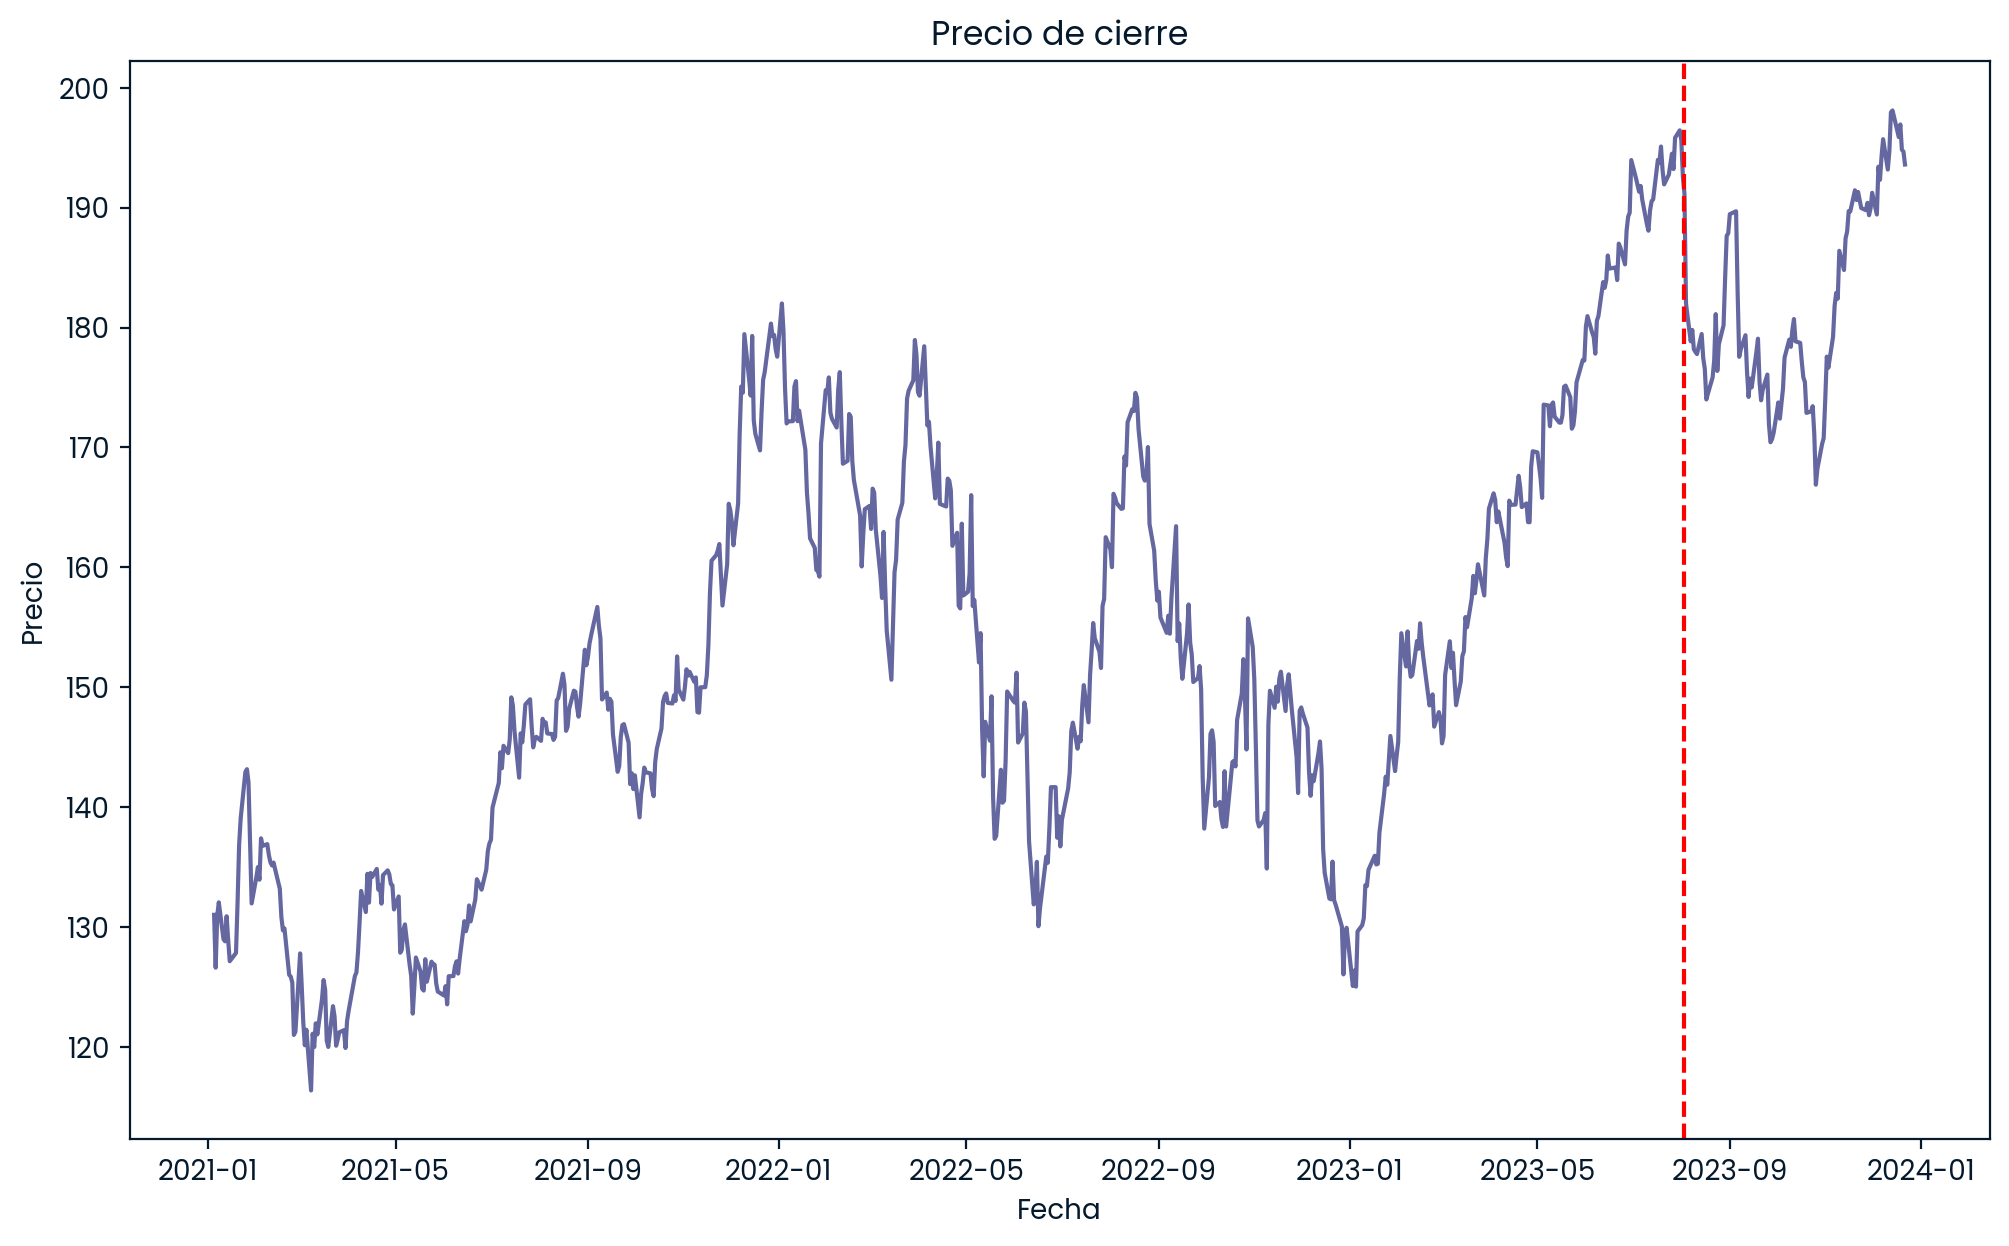

In [5]:
# Visualizar el precio de cierre de las acciones de Apple a lo largo del tiempo
plt.figure(figsize = (12, 7))
plt.plot(apple.index, apple["Close"])
plt.axvline(x = pd.to_datetime('2023-08-03'), color = 'r', linestyle = '--')
plt.title("Precio de cierre")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

In [6]:
# Amplia los datos de Apple a partir del 27 de julio de 2023 hasta el final del período
zoom_apple = apple.loc["2023-07-27":]

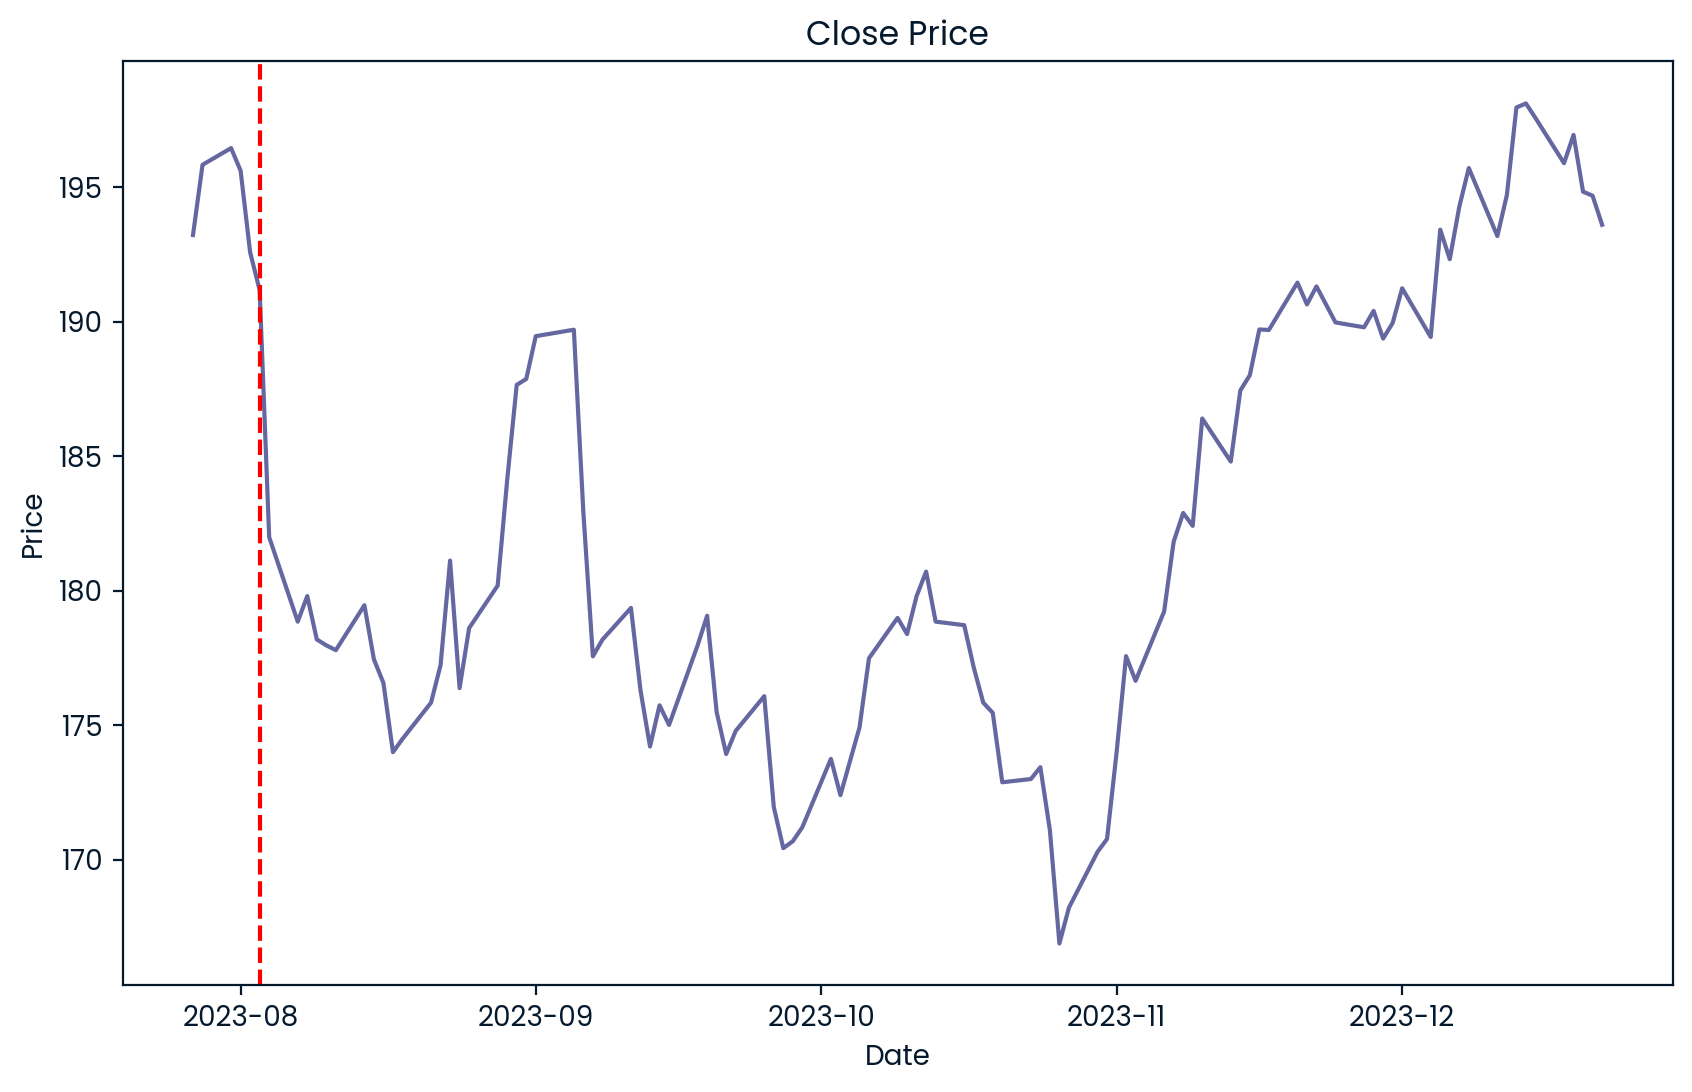

In [7]:
# Visualizar el precio de cierre de las acciones de Apple a partir del 27 de julio de 2023
plt.figure(figsize = (10, 6))
plt.plot(zoom_apple.index, zoom_apple["Close"])
plt.axvline(x = pd.to_datetime('2023-08-03'), color = 'r', linestyle = '--')
plt.title("Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


# Los precios de cierre en general disminuyeron de 2023-08 al 2023-11 y luego aumentaron de enero de 2023-11 a 2024.

Esta gráfica muestra el precio de cierre de las acciones de Apple a partir del 27 de julio de 2023. La línea azul representa la evolución del precio de cierre a lo largo del tiempo, mientras que la línea roja punteada indica una fecha específica, en este caso, el 3 de agosto de 2023.

La utilidad de esta gráfica radica en proporcionar una representación visual de cómo ha variado el precio de cierre de las acciones de Apple en un período específico.

En este caso, se observa que los precios de cierre en general disminuyeron desde agosto de 2023 hasta noviembre de 2023, y luego aumentaron nuevamente a partir de enero de 2024. Siendo util para comprender la tendencia de los precios y tomar decisiones informadas sobre la compra, venta o retención de acciones de Apple.


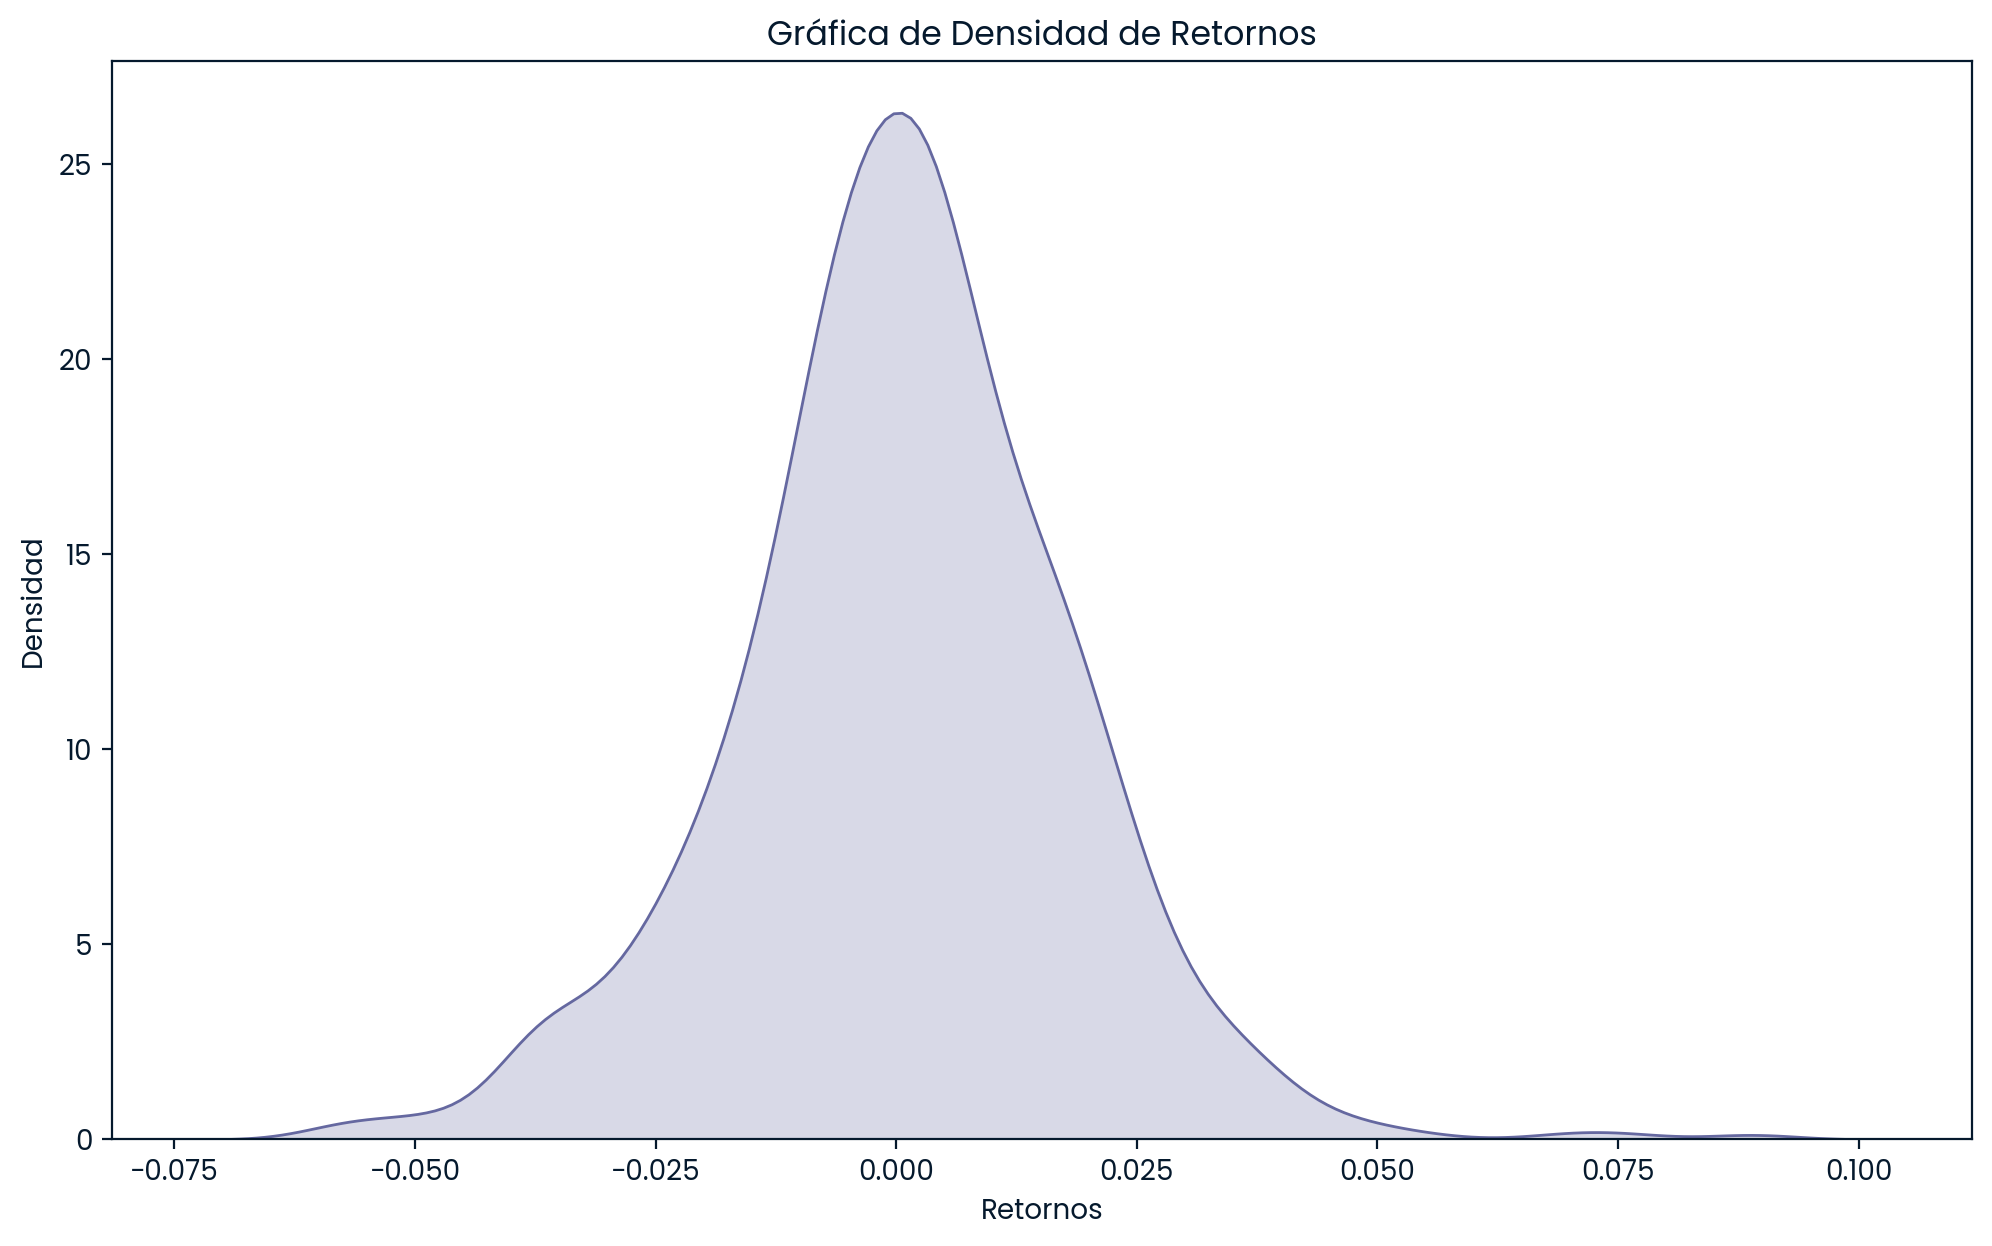

In [8]:
# Visualizar la densidad de los retornos de las acciones de Apple
plt.figure(figsize = (12, 7))
sns.kdeplot(apple['Retornos'], fill = True)
plt.title('Gráfica de Densidad de Retornos')
plt.xlabel('Retornos')
plt.ylabel('Densidad')
plt.show()


# Se puede ver que los retornos de Apple tienden a ser positivos, aunque con una probabilidad más baja en comparación con los retornos negativos. Además, se puede observar que los retornos son más densos alrededor de los valores mínimos y máximos de los LO, lo que sugiere que estos retornos son más comunes. Esto puede deberse a la volatilidad del mercado, donde las ganancias o pérdidas significativas son más probables que los retornos moderados.

Esta gráfica muestra la densidad de los retornos de las acciones de Apple. Utiliza un gráfico de densidad (Kernel Density Estimation) para visualizar la distribución de los retornos. La línea azul en el gráfico representa la densidad estimada de los retornos.

La utilidad de esta gráfica es proporcionar información sobre la distribución de los retornos de las acciones de Apple. Al observar la forma de la curva de densidad, podemos inferir cómo se distribuyen los retornos en torno a ciertos valores. 

Siendo útil para comprender la volatilidad del mercado y la probabilidad de obtener ciertos tipos de retornos. Por ejemplo, la observación de una alta densidad de retornos extremos puede indicar una menor volatilidad y un menor riesgo asociado con la inversión en acciones de Apple.

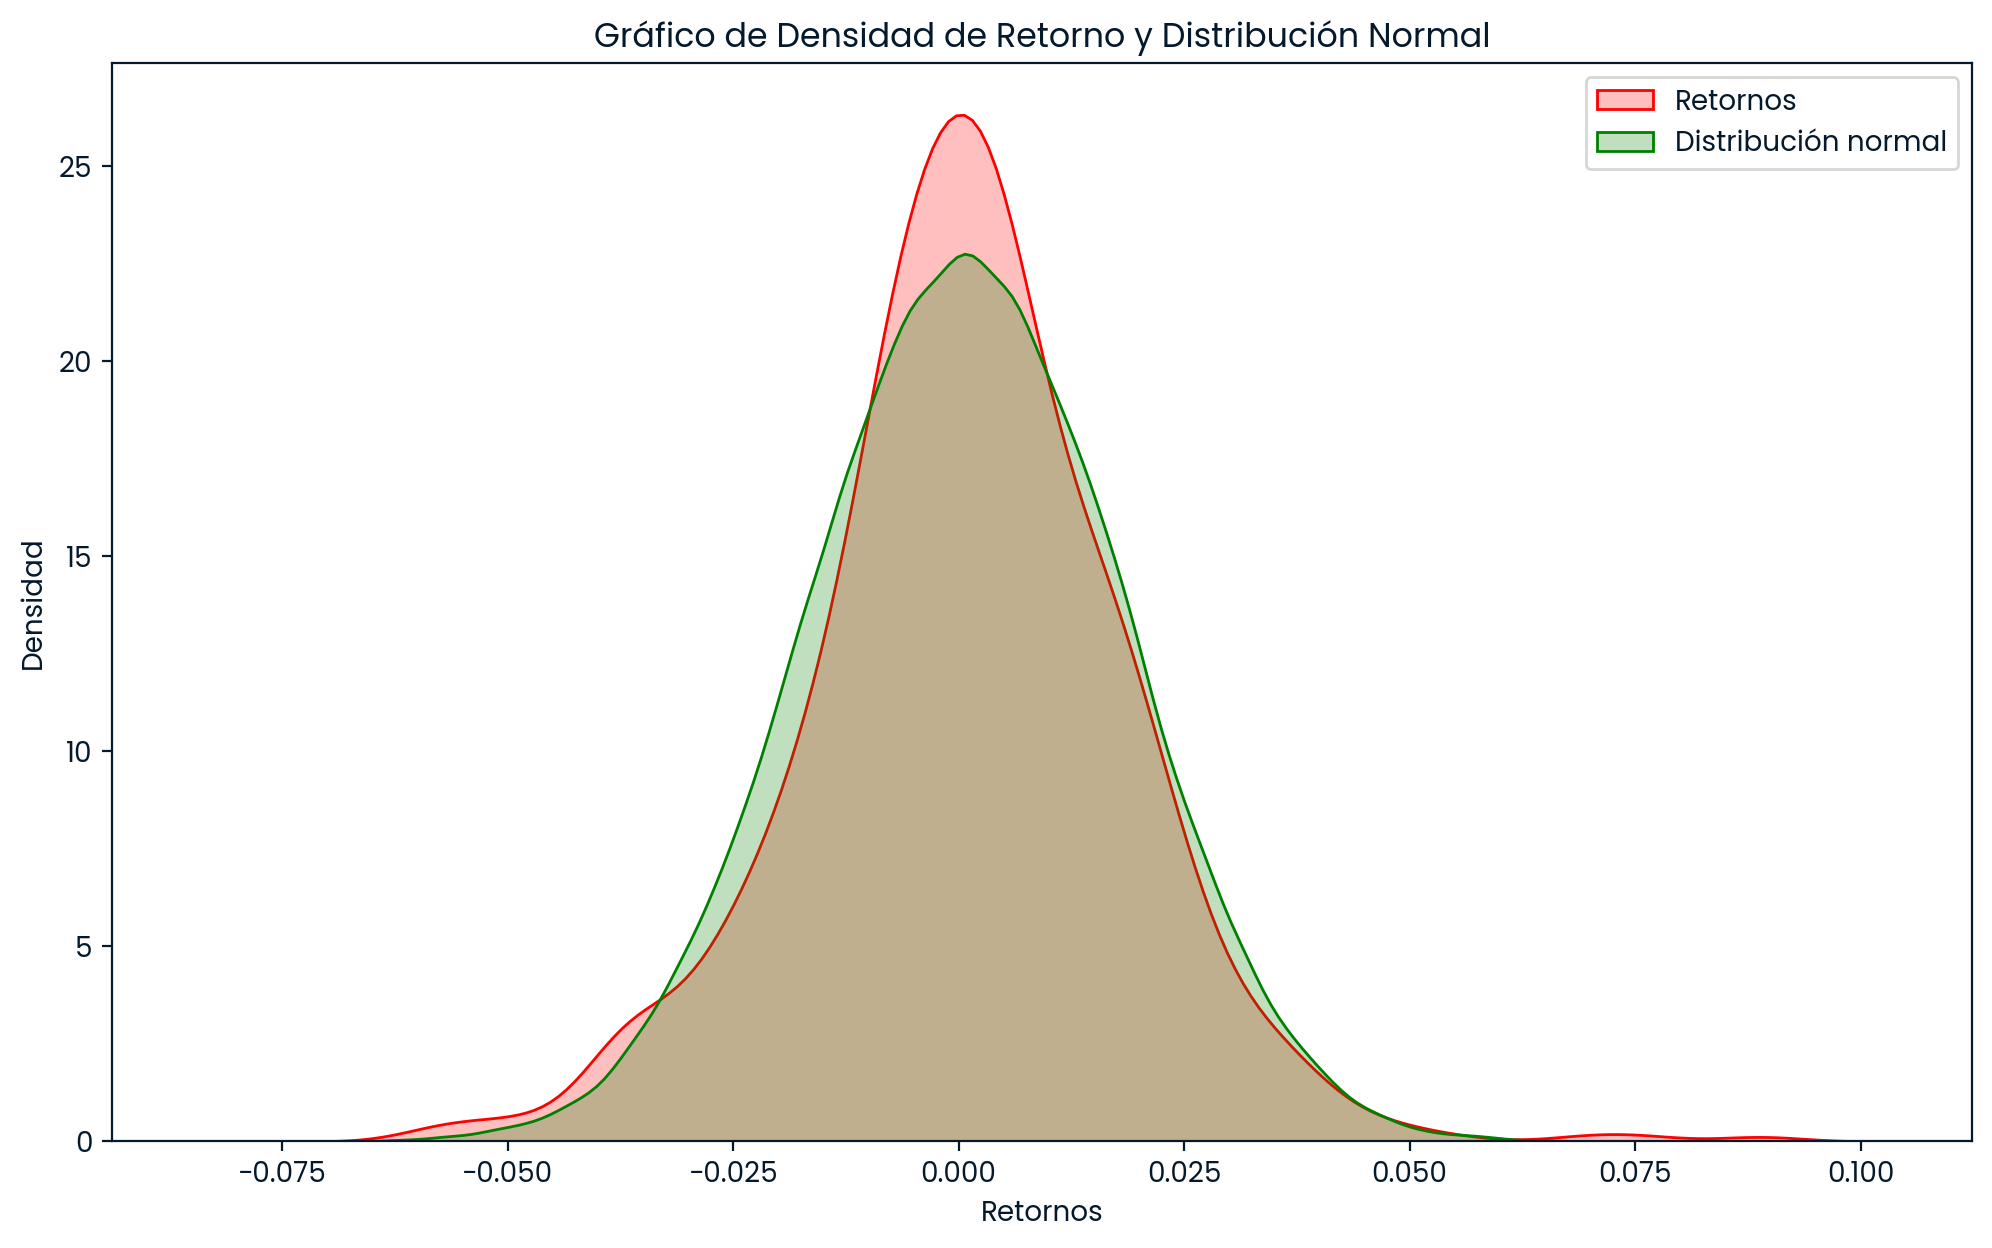

In [9]:
plt.figure(figsize = (12, 7))
mean_return = np.mean(apple['Retornos'])
var_return = np.var(apple['Retornos'])
samples = np.random.normal(mean_return, np.sqrt(var_return), 100000)

sns.kdeplot(apple['Retornos'], fill = True, label = 'Retornos', color = "r")
sns.kdeplot(samples, fill = True, label = 'Distribución normal', 
            color = "g")
plt.title('Gráfico de Densidad de Retorno y Distribución Normal')
plt.xlabel('Retornos')
plt.ylabel('Densidad')
plt.legend()
plt.show()



# El gráfico muestra que la densidad de retornos (en rojo) es generalmente mayor que la distribución normal (en verde) para los valores de retorno dados. Esto significa que los rendimientos tienen una mayor probabilidad de ocurrir en ciertos rangos en comparación con la distribución normal.

Esta gráfica compara la densidad de los retornos de las acciones de Apple con una distribución normal. Para hacer esto, primero se calcula la media y la varianza de los retornos reales de Apple. Luego, se generan 100,000 muestras aleatorias de una distribución normal con la misma media y varianza.

En el gráfico, se puede observar que la línea roja representa la densidad de los retornos reales de Apple, mientras que la línea verde muestra la densidad de la distribución normal generada. Al comparar estas dos líneas, podemos visualizar cómo se distribuyen los retornos reales en relación con una distribución normal.

El gráfico es útil ya que proporciona una comparación visual entre la distribución real de los retornos y una distribución normal teórica. Al observar que la densidad de los retornos reales (línea roja) es generalmente mayor que la distribución normal (línea verde) para los valores de retorno dados, podemos inferir que los retornos reales tienen una distribución diferente a una distribución normal. Esto puede indicar la presencia de ciertos patrones o características en los retornos que no se ajustan a una distribución normal, permitiendo evaluar el riesgo y la volatilidad de las acciones de Apple.

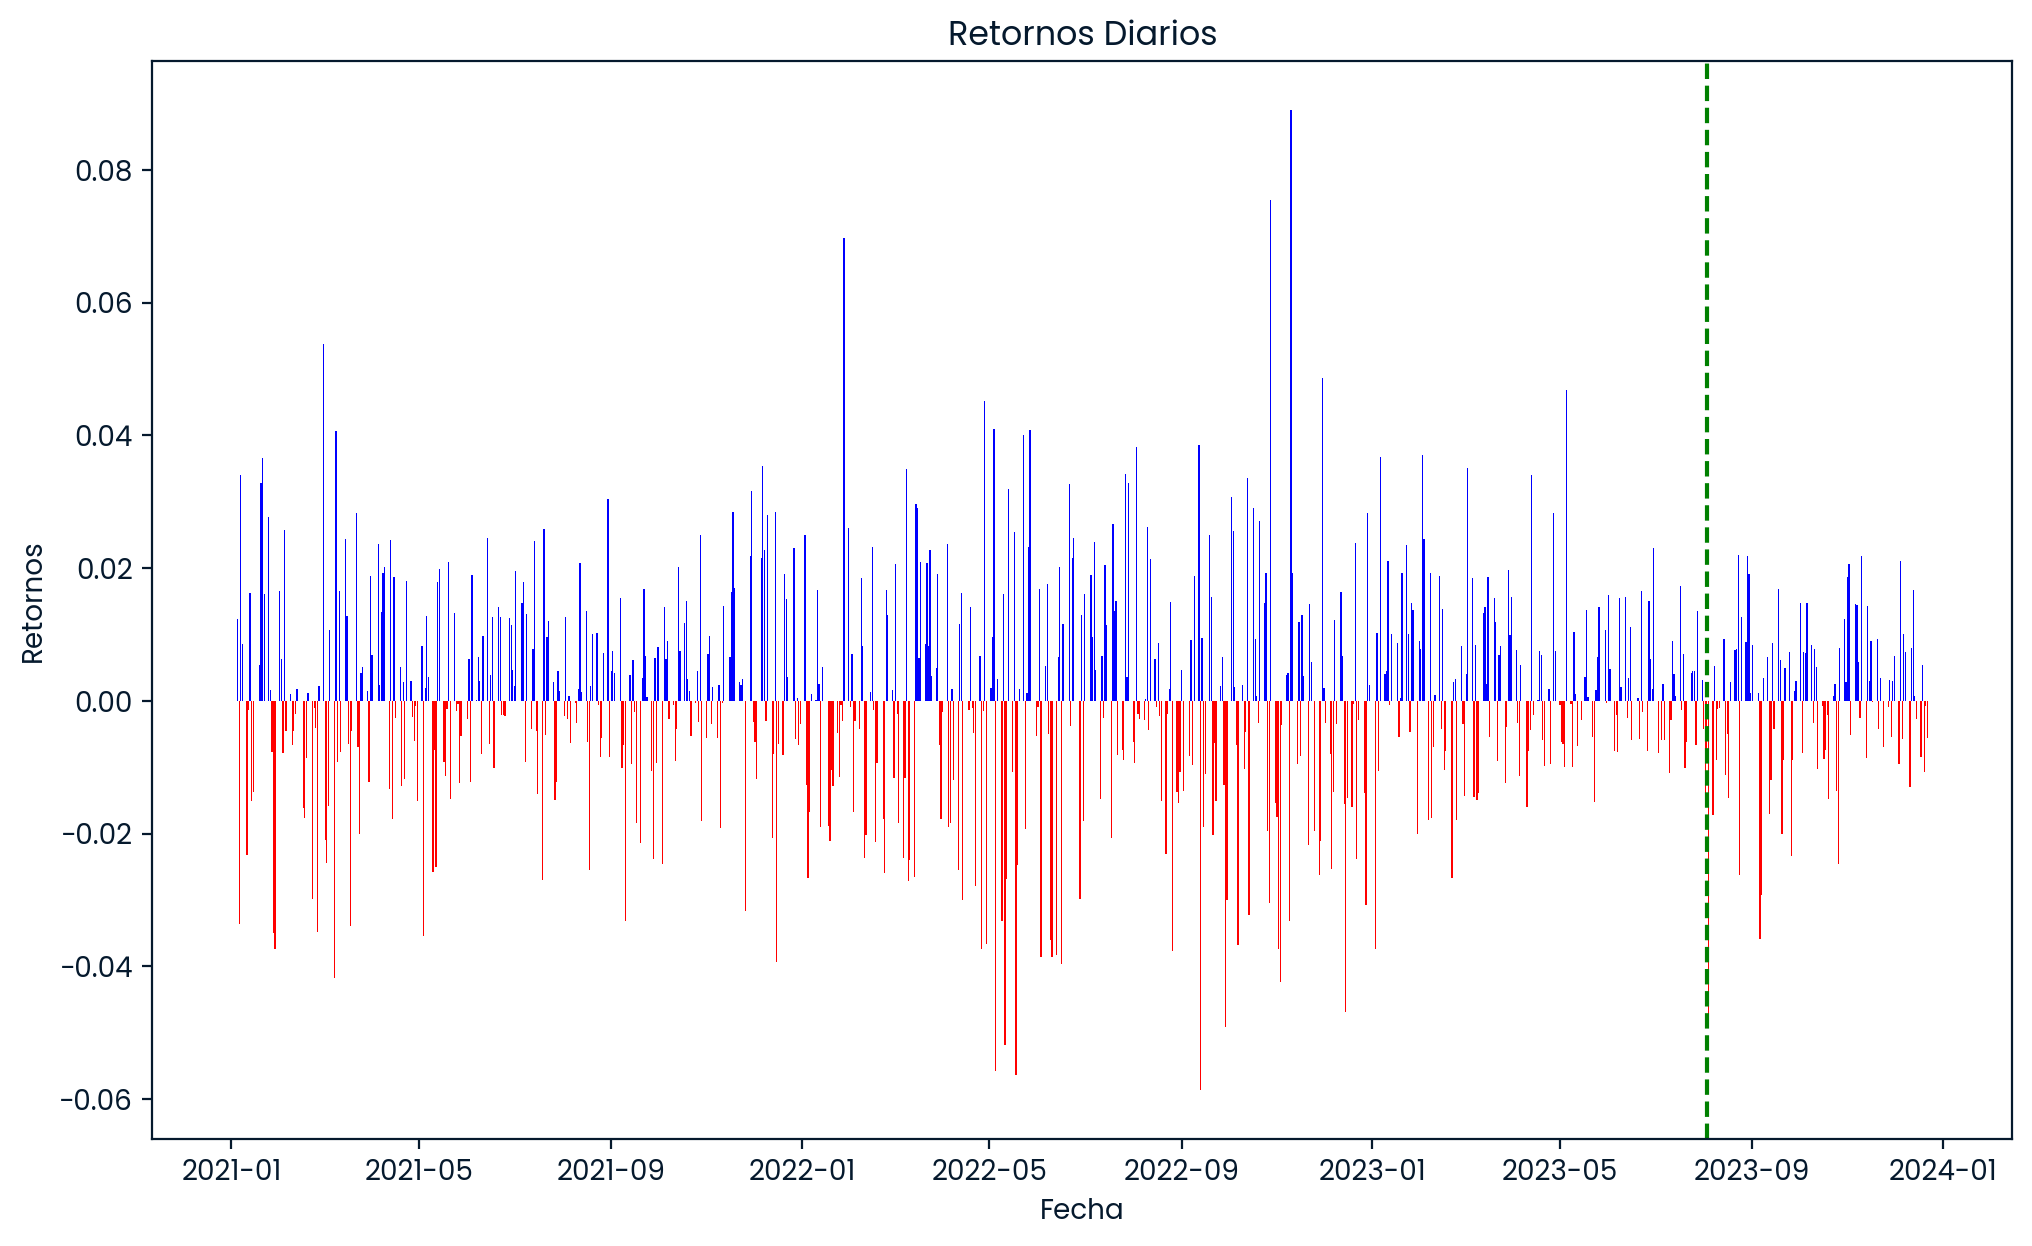

In [10]:
# Visualizar los retornos diarios de las acciones de Apple en un gráfico de barras
plt.figure(figsize = (12, 7))
plt.bar(apple.index, apple['Retornos'], 
        color=['blue' if x > 0 else 'red' for x in apple['Retornos']])
plt.axvline(x=pd.to_datetime('2023-08-03'), color = 'g', linestyle = '--')
plt.title('Retornos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.show()

Esta gráfica muestra los retornos diarios de las acciones de Apple en un gráfico de barras. Cada barra representa el retorno diario para una fecha específica.
- Las barras de color azul representan retornos positivos, lo que significa que el precio de cierre de las acciones aumentó con respecto al día anterior.
- Las barras de color rojo representan retornos negativos, lo que indica que el precio de cierre de las acciones disminuyó con respecto al día anterior.
La línea punteada verde vertical marca una fecha específica en el eje x, en este caso, el 3 de agosto de 2023.

La utilidad de esta gráfica es proporcionar una representación visual de cómo varían los retornos diarios de las acciones de Apple a lo largo del tiempo.

In [11]:
# Extraer los retornos diarios a partir del 3 de agosto de 2023
testReturns = apple["Retornos"].loc[pd.to_datetime('2023-08-03'):]
testReturns

Date
2023-08-03   -0.007322
2023-08-04   -0.048020
2023-08-07   -0.017254
2023-08-08    0.005312
2023-08-09   -0.008954
                ...   
2023-12-18   -0.008503
2023-12-19    0.005360
2023-12-20   -0.010714
2023-12-21   -0.000770
2023-12-22   -0.005547
Name: Retornos, Length: 100, dtype: float64

In [12]:
# Calcula los retornos acumulados multiplicando (1 + retornos) en cada fecha para obtener el efecto de la acumulación.
cumulative_returns = (1+testReturns).cumprod()
cumulative_returns

Date
2023-08-03    0.992678
2023-08-04    0.945010
2023-08-07    0.928705
2023-08-08    0.933638
2023-08-09    0.925278
                ...   
2023-12-18    1.017188
2023-12-19    1.022640
2023-12-20    1.011683
2023-12-21    1.010905
2023-12-22    1.005297
Name: Retornos, Length: 100, dtype: float64

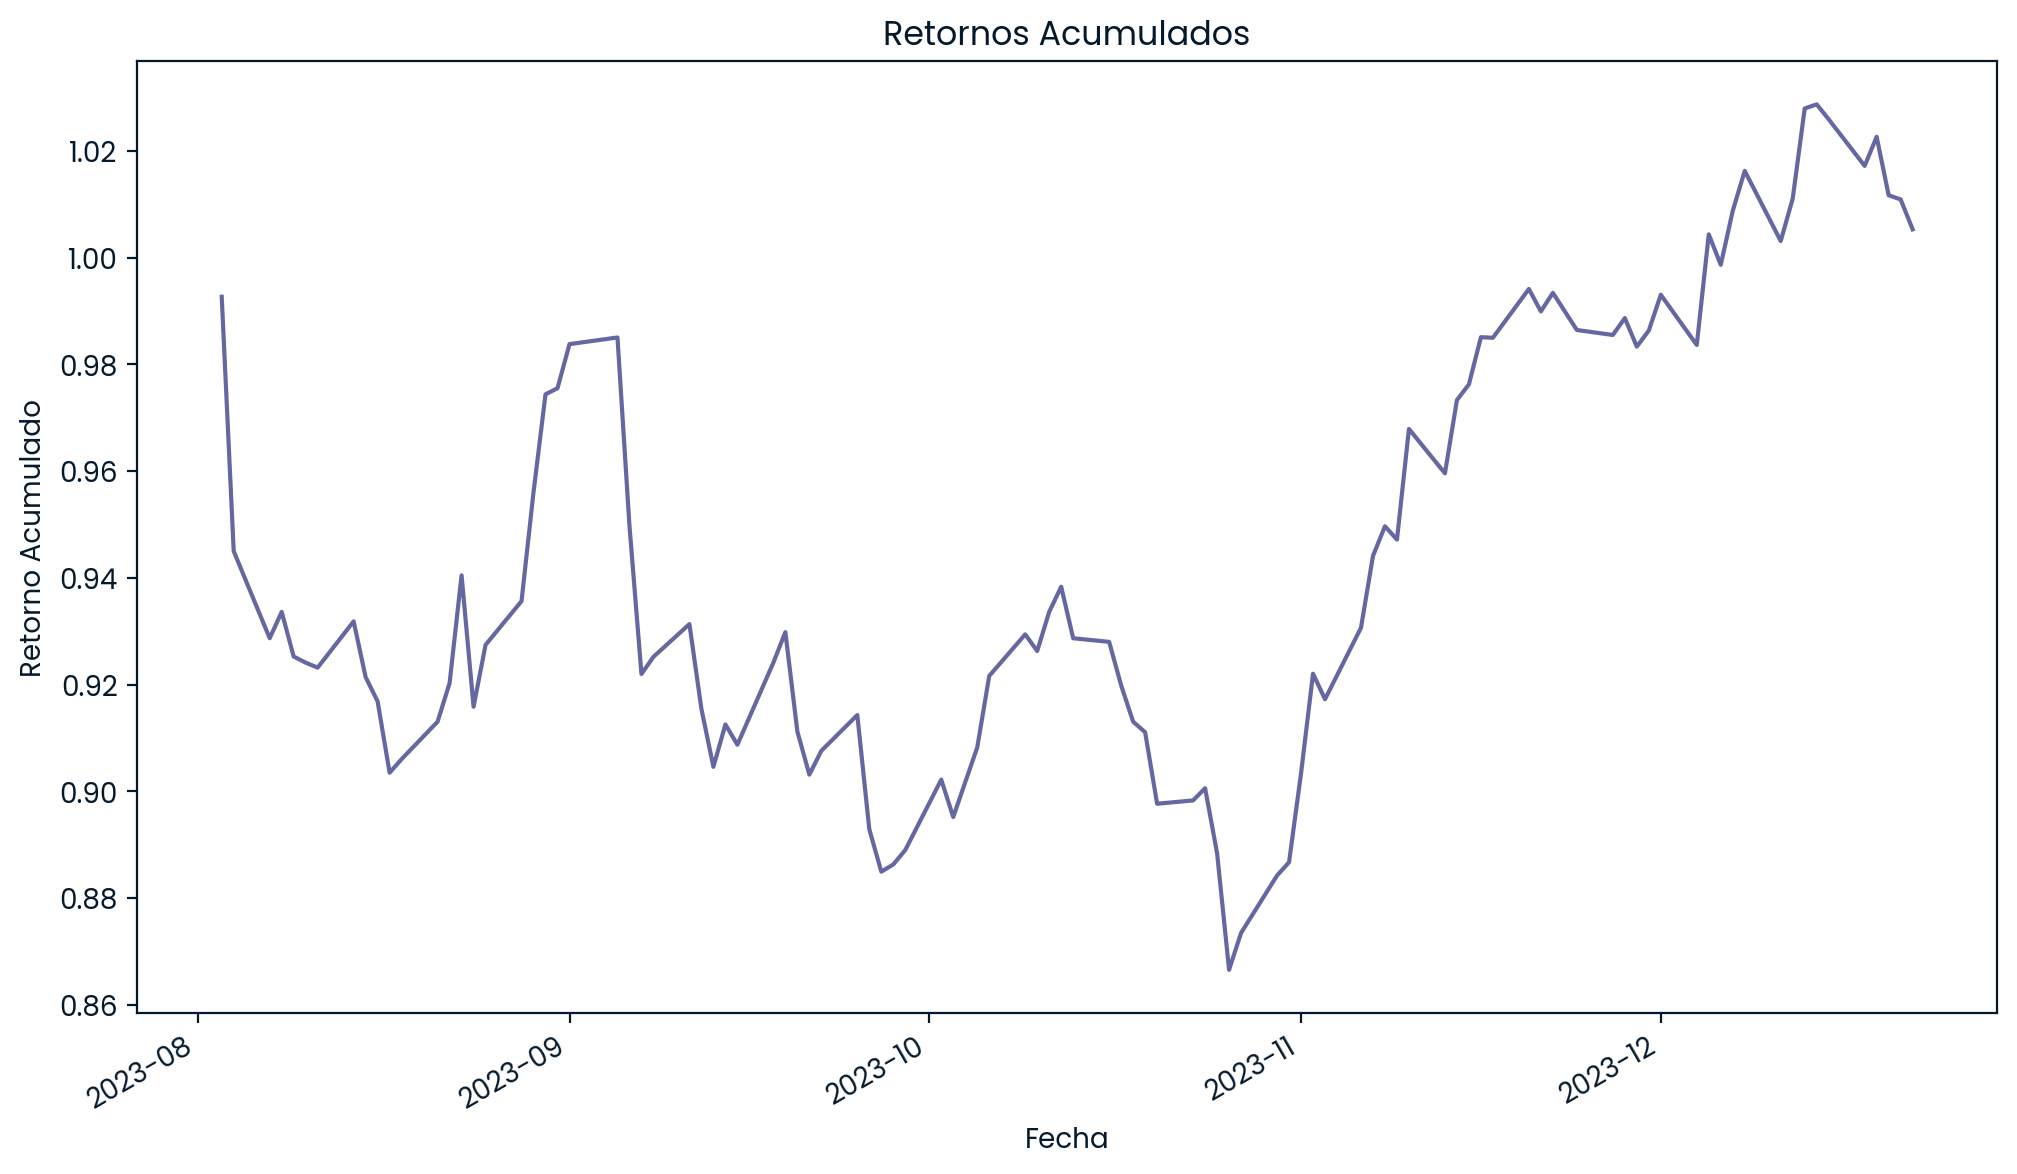

In [13]:
# Muestra los retornos acumulados en un gráfico a lo largo del tiempo.
cumulative_returns.plot(figsize=(12, 7))
plt.title('Retornos Acumulados')
plt.xlabel('Fecha')
plt.ylabel('Retorno Acumulado')
plt.show()


# Los rendimientos acumulados están fluctuando, con un máximo de 1,02 y un mínimo de 0,86. Los rendimientos parecen tener una tendencia a la baja, con algunos períodos de ligeros aumentos desde el mes de noviembre a diciembre.

Esta gráfica muestra los retornos acumulados de las acciones de Apple a lo largo del tiempo. Cada punto en el eje vertical representa el valor acumulado de los retornos en un momento específico en el tiempo, mientras que el eje horizontal representa las fechas.

La utilidad de esta gráfica radica en proporcionar una representación visual de cómo han variado los retornos acumulados de las acciones de Apple a lo largo del período de tiempo analizado. Al observar la dirección y la magnitud de las fluctuaciones en la línea, se pueden identificar tendencias y patrones en los retornos acumulados.

En este caso, se observa que los retornos acumulados fluctúan, con un máximo de 1.02 y un mínimo de 0.86. Además, los retornos parecen tener una tendencia a la baja, con algunos períodos de ligeros aumentos desde noviembre hasta diciembre. 

# INDICADOR MACD


In [14]:
# Se copian los datos originales
data = apple.copy()

In [15]:
# Se calcula la media móvil exponencial de corto plazo (EMA corto) con un período de 1 día
data["emashort"] = data["Close"].ewm(span=1).mean()

# Se calcula la media móvil exponencial de largo plazo (EMA largo) con un período de 3 días
data["emalong"] = data["Close"].ewm(span=3).mean()
data

,Open,High,Low,Close,Adj Close,Volume,Retornos,emashort,emalong
Date,,,,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572327,97664900,0.012364,131.009995,131.009995
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000,-0.033662,126.599998,128.069997
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200,0.034123,130.919998,129.698569
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200,0.008631,132.050003,130.952667
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.580109,100384500,-0.023249,128.979996,129.934514
...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,-0.008503,195.889999,196.614783
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,0.005360,196.940002,196.777393
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,-0.010714,194.830002,195.803697


In [16]:
# Calcular la línea MACD: EMA a corto plazo - EMA a largo plazo
data["lineaMACD"] = data["emashort"] - data["emalong"]

# Calcular la línea de señal usando EWMA con un período de 4
data["lineasignal"] = data["lineaMACD"].ewm(span=4).mean()

# Calcular el histograma MACD: línea MACD - línea de señal
data["histograma"] = data["lineaMACD"] - data["lineasignal"] 

data

,Open,High,Low,Close,Adj Close,Volume,Retornos,emashort,emalong,lineaMACD,lineasignal,histograma
Date,,,,,,,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572327,97664900,0.012364,131.009995,131.009995,0.000000,0.000000,0.000000
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000,-0.033662,126.599998,128.069997,-1.469999,-0.918749,-0.551250
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200,0.034123,130.919998,129.698569,1.221429,0.173178,1.048251
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200,0.008631,132.050003,130.952667,1.097336,0.597883,0.499453
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.580109,100384500,-0.023249,128.979996,129.934514,-0.954518,-0.075435,-0.879084
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,-0.008503,195.889999,196.614783,-0.724783,0.118689,-0.843472
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,0.005360,196.940002,196.777393,0.162610,0.136257,0.026353
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,-0.010714,194.830002,195.803697,-0.973695,-0.307724,-0.665972


La línea MACD oscila por encima y por debajo de la línea cero. Estos cruces indican que la EMA Corto de 1 día ha cruzado la EMA Largo de 3 días. La dirección, por supuesto, depende de la dirección del cruce de media móvil. MACD positivo indica que la EMA de 1 día está por encima de la EMA de 3 días. Los valores positivos aumentan a medida que la EMA más corta se aleja más de la EMA más larga. Esto significa que el momentum alcista está aumentando. Los valores MACD negativos indican que la EMA de 1 día está por debajo de la EMA de 3 días. Los valores negativos aumentan a medida que la EMA más corta diverge más por debajo de la EMA más larga. Esto significa que el momentum bajista está aumentando. En el cálculo de la línea de señal para predecir la compra, venta o mantener las acciones de Apple, se define en un periodo de 4 días dado que en el análisis MACD proporciona una visión más sensible reaccionando más rápido a los cambios en el precio de las acciones, esto permite capturar movimientos mas recientes y con un potencial de identificar las señales más tempranas de compra, venta o mantener. En mercados volátiles con cambios rápidos en las acciones, determinamos que un periodo de 4 días puede ayudar a adaptarse mas rápidamente a las futuras condiciones del mercado.

In [17]:
# Calcula cambios en el histograma y los registra en una nueva columna llamada "cambio_histograma".

# Primer cambio: asigna 1 a "cambio_histograma" donde el valor previo del histograma era negativo
# y el valor actual es positivo; de lo contrario, asigna 0.
data["cambio_histograma"] = np.where( (data["histograma"].shift(1) < 0) & (data["histograma"] > 0),
                                     1,0)

# Segundo cambio: modifica "cambio_histograma".
# Asigna -1 donde el valor previo del histograma era positivo
# y el valor actual es negativo; de lo contrario, conserva los valores existentes en "cambio_histograma".
data["cambio_histograma"] = np.where( (data["histograma"].shift(1) > 0) & (data["histograma"] < 0),
                                     -1, data["cambio_histograma"])
data

,Open,High,Low,Close,Adj Close,Volume,Retornos,emashort,emalong,lineaMACD,lineasignal,histograma,cambio_histograma
Date,,,,,,,,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572327,97664900,0.012364,131.009995,131.009995,0.000000,0.000000,0.000000,0
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244385,155088000,-0.033662,126.599998,128.069997,-1.469999,-0.918749,-0.551250,0
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.484009,109578200,0.034123,130.919998,129.698569,1.221429,0.173178,1.048251,1
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.592987,105158200,0.008631,132.050003,130.952667,1.097336,0.597883,0.499453,0
2021-01-11,129.190002,130.169998,128.500000,128.979996,126.580109,100384500,-0.023249,128.979996,129.934514,-0.954518,-0.075435,-0.879084,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,-0.008503,195.889999,196.614783,-0.724783,0.118689,-0.843472,0
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,0.005360,196.940002,196.777393,0.162610,0.136257,0.026353,1
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,-0.010714,194.830002,195.803697,-0.973695,-0.307724,-0.665972,-1


El fin de crear una nueva columna "cambio_histograma" es poder capturar los cambios del "histograma" para detectar los momentos del cambio de tendencia. La condición para asignar valores de 1 para compra, -1 para venta y 0 para mantener en la columna "cambio_histograma" se dice que si el valor anterior de la columna histograma es mayor a 0 y el valor actual del histograma es menor que 0 se asigna un valor de 1 a la columna indicando un cambio positivo en el histograma, si la condición no se cumple, se asigna el valor de 0. En el otro caso, se tiene que dar la condición de que si el valor previo del histograma es positivo (mayor a 0) y el valor actual del histograma es negativo (menor que 0) se asigna un valor de -1 en la columna "cambio_histograma" indicando un cambio negativo en el histograma, si la condición no se cumple, se conservan los valores existentes. Esta columna nos resulta útil para identificar los momentos de cambio de tendencia.

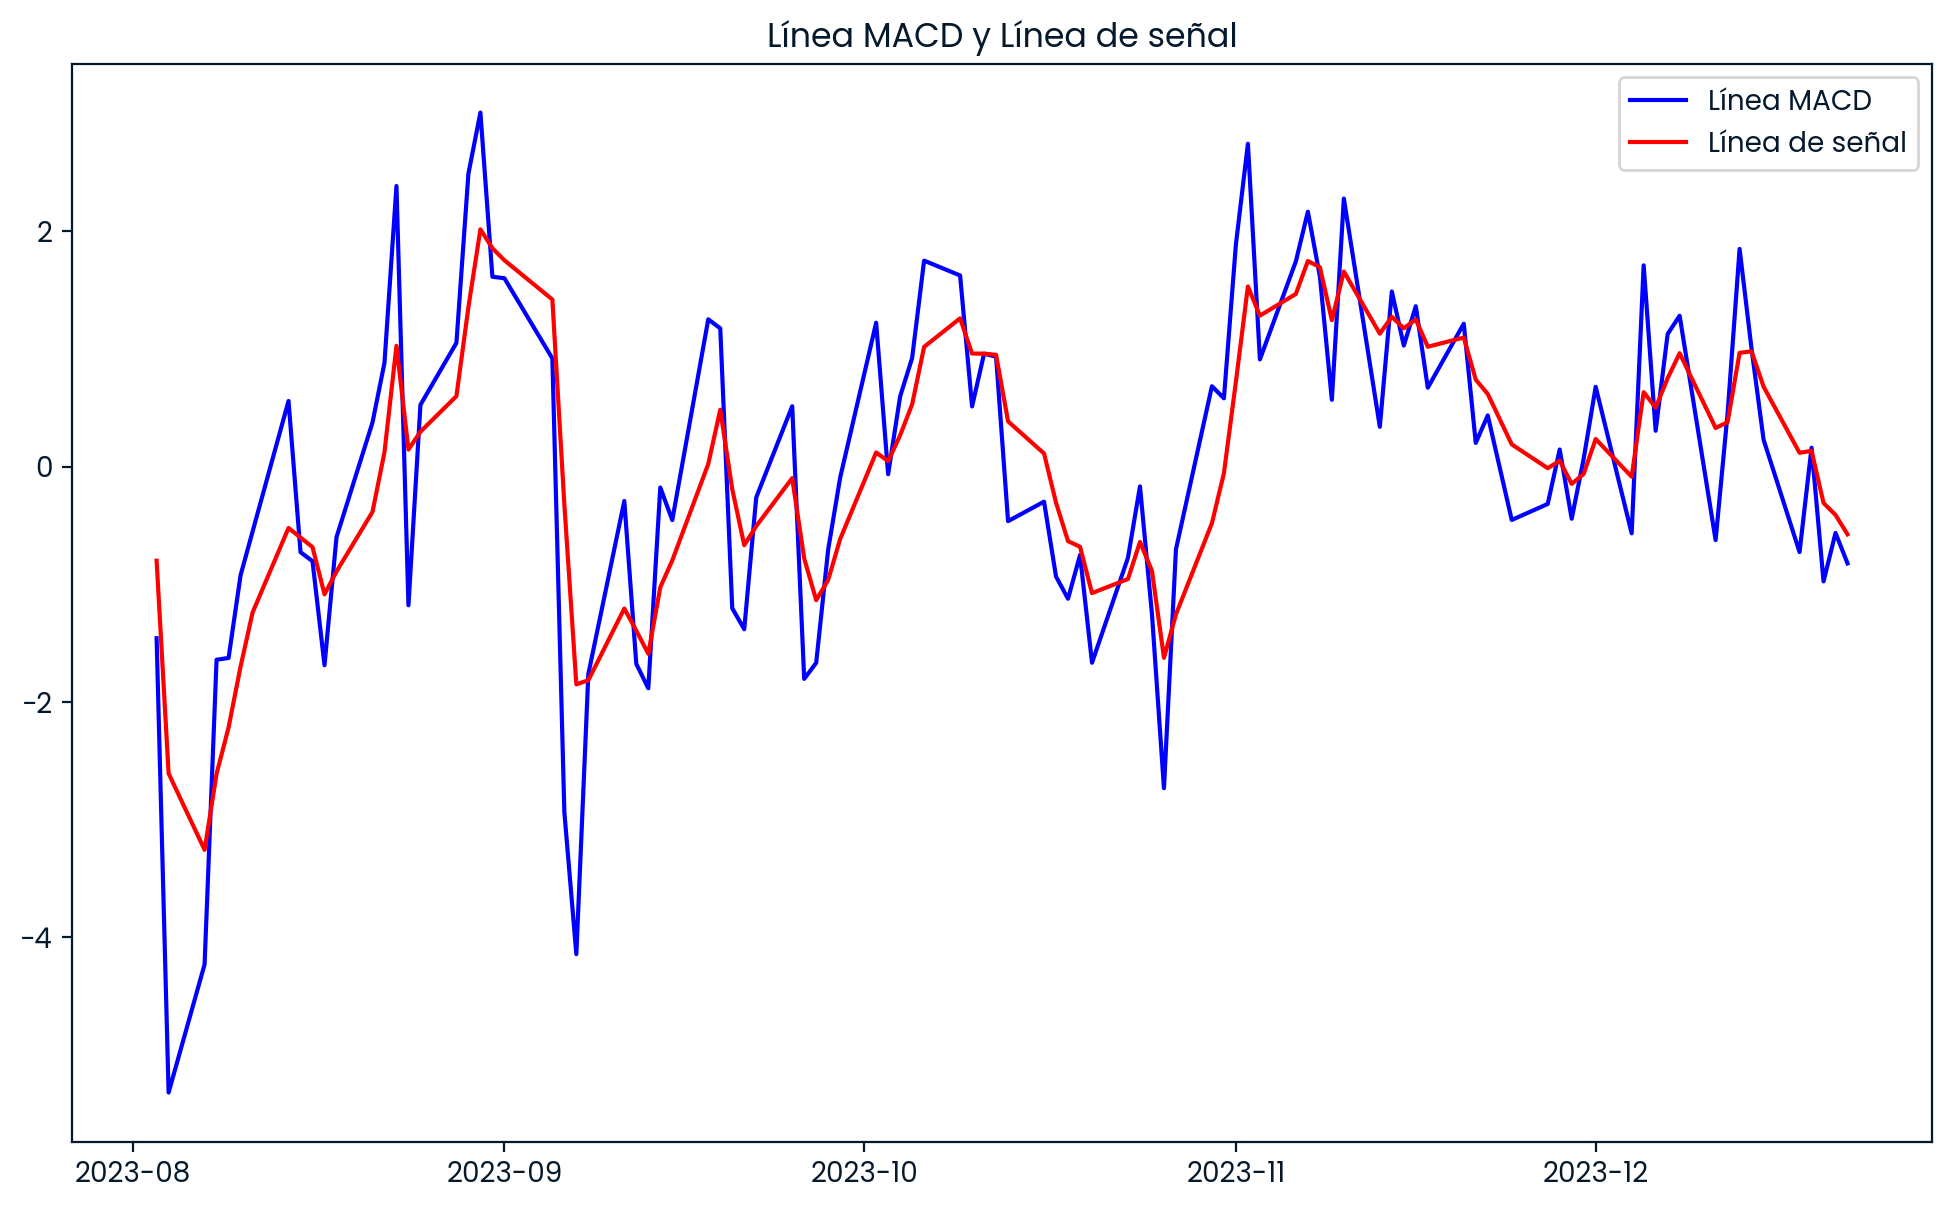

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(data.loc["2023-08-03":,"lineaMACD"], label="Línea MACD", color="blue")
plt.plot(data.loc["2023-08-03":,"lineasignal"], label="Línea de señal", color="red")
plt.title("Línea MACD y Línea de señal")
plt.legend()
plt.show()

En esta gráfica donde se muestra la linea MACD y la línea de señal, nos ayuda a evidenciar que, cuando la línea MACD cruza por encima de la línea de señal, estaría indicando una señal de compra indicando un aumento en el impulso alcista sugiriendo que la la tendencia podría aumentar indicando que es un momento justo para comprar. De lo contrario, cuando la línea MACD cruza por debajo de la línea de señal se puede interpretar como una señal de venta indicando una tendencia bajista en las acciones con probabilidad de fortalecerse, esto se resume, que es una señal de que el precio podría caer en un futuro, lo cual podría ser un buen momento para vender la acción.

## ETIQUETAS Y TARGETS 

In [19]:
# Seleccionamos las características relevantes para el análisis, incluyendo la línea MACD, la línea de señal,
# el histograma del MACD y un indicador de cambio en el histograma. Estas características se almacenan en la variable X.
X = data[ ["lineaMACD","lineasignal", "histograma", "cambio_histograma"] ]
X

,lineaMACD,lineasignal,histograma,cambio_histograma
Date,,,,
2021-01-05,0.000000,0.000000,0.000000,0
2021-01-06,-1.469999,-0.918749,-0.551250,0
2021-01-07,1.221429,0.173178,1.048251,1
2021-01-08,1.097336,0.597883,0.499453,0
2021-01-11,-0.954518,-0.075435,-0.879084,-1
...,...,...,...,...
2023-12-18,-0.724783,0.118689,-0.843472,0
2023-12-19,0.162610,0.136257,0.026353,1
2023-12-20,-0.973695,-0.307724,-0.665972,-1


# Selección de Características Relevantes:
* lineaMACD y lineasignal: Estas características representan la línea MACD y la línea de señal, respectivamente. La línea MACD se utiliza comúnmente como un indicador de tendencia, mientras que la línea de señal se utiliza para confirmar la tendencia. Ambas líneas son importantes en el análisis técnico del MACD y se consideran relevantes para predecir movimientos futuros del precio de la acción.
histograma: El histograma MACD muestra la diferencia entre la línea MACD y la línea de señal. Los cambios en el histograma pueden indicar cambios en la fuerza o la dirección de la tendencia. Por lo tanto, el histograma es una característica importante para identificar posibles puntos de inflexión en la tendencia del precio.
* cambio_histograma: Esta característica indica cambios en el histograma MACD. Los cambios en el histograma pueden ser señales de cambios en la tendencia del precio. Por lo tanto, el cambio en el histograma es una característica relevante para identificar puntos de entrada o salida potenciales en una posición.

In [20]:
# Definir umbrales para comprar y vender
umbral_compra = 0.01  # Por ejemplo, si el retorno diario es mayor que 1%, se considera "comprar"
umbral_venta = -0.01  # Si es menor que -1%, se considera "vender"

# Crear variable Y basada en los umbrales
Y = np.where(data["Retornos"] > umbral_compra, 1,
             np.where(data["Retornos"] < umbral_venta, -1, 0))


# Definición de Umbrales de Compra y Venta:
* Los umbrales de compra y venta se definen en 0.01 y -0.01 respectivamente. Estos umbrales representan un cambio porcentual en el precio que se considera significativo para tomar decisiones de compra o venta. Se seleccionaron estos umbrales debido a su uso común en el análisis técnico y su capacidad para identificar cambios importantes en la dirección del precio.
* Los umbrales podrían ajustarse según la tolerancia al riesgo y la estrategia de inversión de cada trader. Por ejemplo, un trader más conservador podría usar umbrales más altos para minimizar el riesgo, mientras que un trader más agresivo podría usar umbrales más bajos para buscar mayores ganancias.


Los umbrales de compra y venta son una parte crucial de la estrategia de trading y se seleccionan cuidadosamente para reflejar las condiciones del mercado y los objetivos de inversión. En este caso, se eligieron los umbrales de 0.01 y -0.01 basados en consideraciones específicas:

* Sensibilidad al Cambio de Precios: Un umbral del 1% refleja un cambio relativamente pequeño en el precio de la acción. Este nivel de sensibilidad puede ser apropiado para identificar cambios sutiles pero significativos en la tendencia de los precios, lo que permite capturar oportunidades de trading en un rango más amplio de condiciones del mercado.
* Balance entre Riesgo y Recompensa: Los umbrales de compra y venta se seleccionan para equilibrar el riesgo y la recompensa. Un umbral demasiado bajo puede resultar en muchas señales falsas y operaciones frecuentes, lo que aumenta el riesgo de pérdida. Por otro lado, un umbral demasiado alto puede hacer que se pierdan oportunidades de trading rentables. Un umbral del 1% busca encontrar un equilibrio entre estas consideraciones.
* Consistencia con Estrategias de Trading Comunes: Un umbral del 1% es coherente con muchas estrategias de trading comunes que utilizan análisis técnico. Este umbral es ampliamente aceptado en la comunidad de trading y se ha demostrado efectivo en una variedad de condiciones del mercado.

* Los umbrales de compra y venta del 1% se seleccionaron para equilibrar la sensibilidad al cambio de precios, el riesgo y la consistencia con estrategias de trading comunes. Estos umbrales proporcionan un marco sólido para identificar oportunidades de trading basadas en la interpretación de los indicadores técnicos seleccionados.

## TRAINING **TEST**

In [21]:
# Se tomarán los últimos 100 valores de la base de datos original como test set, esto nos sirve como división.
division = -100

#División de train y test set
X_train, X_test, y_train, y_test = X[:division], X[division:], Y[:division], Y[division:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(648, 4) (100, 4)
(648,) (100,)


In [22]:
X_test.head(100)

,lineaMACD,lineasignal,histograma,cambio_histograma
Date,,,,
2023-08-03,-1.456931,-0.798132,-0.658799,0
2023-08-04,-5.318462,-2.606264,-2.712198,0
2023-08-07,-4.229231,-3.255451,-0.973780,0
2023-08-08,-1.639617,-2.609117,0.969500,1
2023-08-09,-1.624809,-2.215394,0.590585,0
...,...,...,...,...
2023-12-18,-0.724783,0.118689,-0.843472,0
2023-12-19,0.162610,0.136257,0.026353,1
2023-12-20,-0.973695,-0.307724,-0.665972,-1


## Implementación Sklearn

Usar esta herramienta para hacer la división de datos en conjuntos de entrenamiento y prueba utilizando train_test_split de scikit-learn.

Utilizar un algoritmo de clasificación de scikit-learn, Random Forest, para entrenar el modelo.

Utilizar el conjunto de entrenamiento para ajustar los parámetros del modelo.

Utilizar el conjunto de prueba para evaluar el rendimiento del modelo entrenado.

Utilizar métricas como la precisión, el recall y el F1-score para evaluar el rendimiento del modelo.

Utilizar técnicas como GridSearchCV de scikit-learn para encontrar los mejores hiperparámetros para el modelo.

https://scikit-learn.org/stable/index.html

División de Datos: Utilizamor la función train_test_split de Scikit-Learn para dividir nuestro conjunto de datos en conjuntos de entrenamiento y prueba. Esto nos permitirá entrenar nuestro modelo en una parte de los datos y evaluar su rendimiento en otra parte independiente.

Elección del Algoritmo de Aprendizaje: Para este trabajo, hemos decidido utilizar el algoritmo de clasificación de Bosque Aleatorio (Random Forest) proporcionado por Scikit-Learn. Este algoritmo es adecuado para nuestro propósito debido a su capacidad para manejar múltiples características y su flexibilidad para adaptarse a diferentes tipos de datos.

Entrenamiento del Modelo: Utilizamos el conjunto de datos de entrenamiento para ajustar el modelo de Bosque Aleatorio a través de la función fit. Durante este proceso, el modelo aprenderá a identificar patrones en los datos históricos del MACD y la señal del MACD.

Evaluación del Modelo: Una vez entrenado el modelo, evaluaremos su rendimiento utilizando el conjunto de datos de prueba. Calcularemos métricas como precisión, sensibilidad y F1-score para determinar qué tan bien el modelo puede predecir movimientos futuros del precio.

Ajuste de Hiperparámetros: Utilizar técnicas como GridSearchCV de Scikit-Learn para explorar diferentes combinaciones de hiperparámetros del modelo y encontrar los que optimicen su rendimiento. Esto nos ayudará a mejorar la precisión de nuestras predicciones.

1. # RANDOM FOREST CLASSIFIER 

In [23]:
# Creamos una pipeline que incluye un imputador simple para manejar los valores faltantes
# y un clasificador Random Forest con 100 árboles y una semilla aleatoria de 9 para reproducibilidad.
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('classifier', RandomForestClassifier(n_estimators = 100, 
                                          random_state = 9, 
                                         max_depth=3)) #9, 20
])

# Entrenamos el modelo utilizando los datos de entrenamiento X_train e y_train
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier',
                 RandomForestClassifier(max_depth=3, random_state=9))])

Se utilizó Grid Search para determinar los hiperparámetros más adecuados para el modelo, dado que se estaba empleando un árbol de decisión con profundidad indefinida, lo que provocaba sobreajuste. Tras este proceso, se determinó que al establecer una profundidad de 3 para el árbol, se obtuvieron resultados óptimos sin incurrir en sobreajuste.

El uso de un árbol con una profundidad excesiva puede llevar a la memorización de los datos de entrenamiento en lugar de aprender patrones generales que se apliquen bien a datos no observados. Al limitar la profundidad máxima del árbol, se restringe la tendencia del modelo a sobreajustarse a los datos de entrenamiento. Este equilibrio entre la capacidad del modelo para capturar patrones relevantes y la necesidad de evitar el sobreajuste, mejorar la interpretabilidad y garantizar la eficiencia computacional es crucial en el proceso de modelado.

In [24]:
# Predicciones en el conjunto de entrenamiento
y_pred_train = pipeline.predict(X_train)

# Calculamos la precisión en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_pred_train)

print(confusion_matrix(y_train, y_pred_train))

[[115  38   0]
 [ 10 288  16]
 [  0  31 150]]


In [25]:
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.8533950617283951


In [26]:
# Predicción de las etiquetas del conjunto de datos de prueba utilizando el modelo entrenado
y_pred_test = pipeline.predict(X_test)

# Cálculo de la precisión del modelo en el conjunto de datos de prueba
test_accuracy = accuracy_score(y_test, y_pred_test)

print(confusion_matrix(y_test, y_pred_test))

[[14  3  0]
 [ 4 55  7]
 [ 0  2 15]]


In [27]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.84


In [28]:
from sklearn.metrics import recall_score
# Calcula la sensibilidad en el conjunto de entrenamiento
train_sensitivity = recall_score(y_train, y_pred_train, average='macro')

# Calcula la sensibilidad en el conjunto de prueba
test_sensitivity = recall_score(y_test, y_pred_test, average='macro')

print("Sensibilidad en el conjunto de entrenamiento:", train_sensitivity)
print("Sensibilidad en el conjunto de prueba:", test_sensitivity)


Sensibilidad en el conjunto de entrenamiento: 0.8325202403084533
Sensibilidad en el conjunto de prueba: 0.8464052287581699


In [29]:
# Convert numpy array to pandas Series
y_train_series = pd.Series(y_train)
y_train_series.value_counts()

 0    314
 1    181
-1    153
dtype: int64

In [30]:
# Predicción de las etiquetas de retorno para el conjunto de datos posterior a '2023-08-03' utilizando el modelo entrenado
data.loc['2023-08-03':, 'Retorno_prediccion'] = pipeline.predict(X.loc['2023-08-03':])

# Calculando la diferencia entre las predicciones sucesivas para determinar las señales de compra (1), venta (-1) o mantener (0)
data["Senal"] = data["Retorno_prediccion"].diff()
data["Senal"].fillna(0, inplace=True)

# Asignando valores de señal (1 para compra, -1 para venta, 0 para sin cambios)
data.loc[data["Senal"] > 0, "Status"] = 1 #compra
data.loc[data["Senal"] < 0, "Status"] = -1 #venta
data.loc[data["Senal"] == 0, "Status"] = 0 #mantener

# Calculando los retornos según la señal generada
data["Retorno_rt"] = data["Status"] * data["Retornos"]

# Calculando los retornos acumulados
data["Retorno_acumulado"] = (data["Retorno_rt"] + 1).cumprod()

selected_data = data.loc['2023-08-03':, ['Retornos', 'Retorno_prediccion', 'Status', 'Retorno_rt', 'Retorno_acumulado']]

selected_data

,Retornos,Retorno_prediccion,Status,Retorno_rt,Retorno_acumulado
Date,,,,,
2023-08-03,-0.007322,-1.0,0.0,-0.000000,1.000000
2023-08-04,-0.048020,-1.0,0.0,-0.000000,1.000000
2023-08-07,-0.017254,-1.0,0.0,-0.000000,1.000000
2023-08-08,0.005312,0.0,1.0,0.005312,1.005312
2023-08-09,-0.008954,0.0,0.0,-0.000000,1.005312
...,...,...,...,...,...
2023-12-18,-0.008503,-1.0,-1.0,0.008503,1.586190
2023-12-19,0.005360,0.0,1.0,0.005360,1.594692
2023-12-20,-0.010714,0.0,0.0,-0.000000,1.594692


En las anteriores líneas de código hemos utilizado un modelo de machine learning (pipeline) entrenado para predecir los futuros precios de las acciones del mercado. En la línea #5, se calcula la diferencia entre los rendimientos predichos en pasos de tiempo consecutivos, y se almacenan estos cambios en la columna "senal" indicando si hay una tendencia alcista o bajista en el mercado. En las líneas #9, #10, #11, se establece la posición del mercado en función de la señal generada por el modelo dado que si la señal es positiva se establece en corto 1 indicando compra, si es negativo se establece señal -1 indicando venta en corto. En la línea #14 se calcula el rendimiento de la estrategia multiplicando los rendimientos del mercado por la variable status indicando las tendencias del mercado. En la línea #17 se presenta el calculo del retorno acumulado en donde se utiliza los retornos diarios de la serie de datos utilizada y se le suma 1 para poder convertir los retornos diarios en un factor de crecimiento con el fin de poder identificar en porcentaje el crecimiento que se obtiene partiendo de la inversion inicial de 1 dolar y como resultado final tener un crecimiento del 59,46%. 

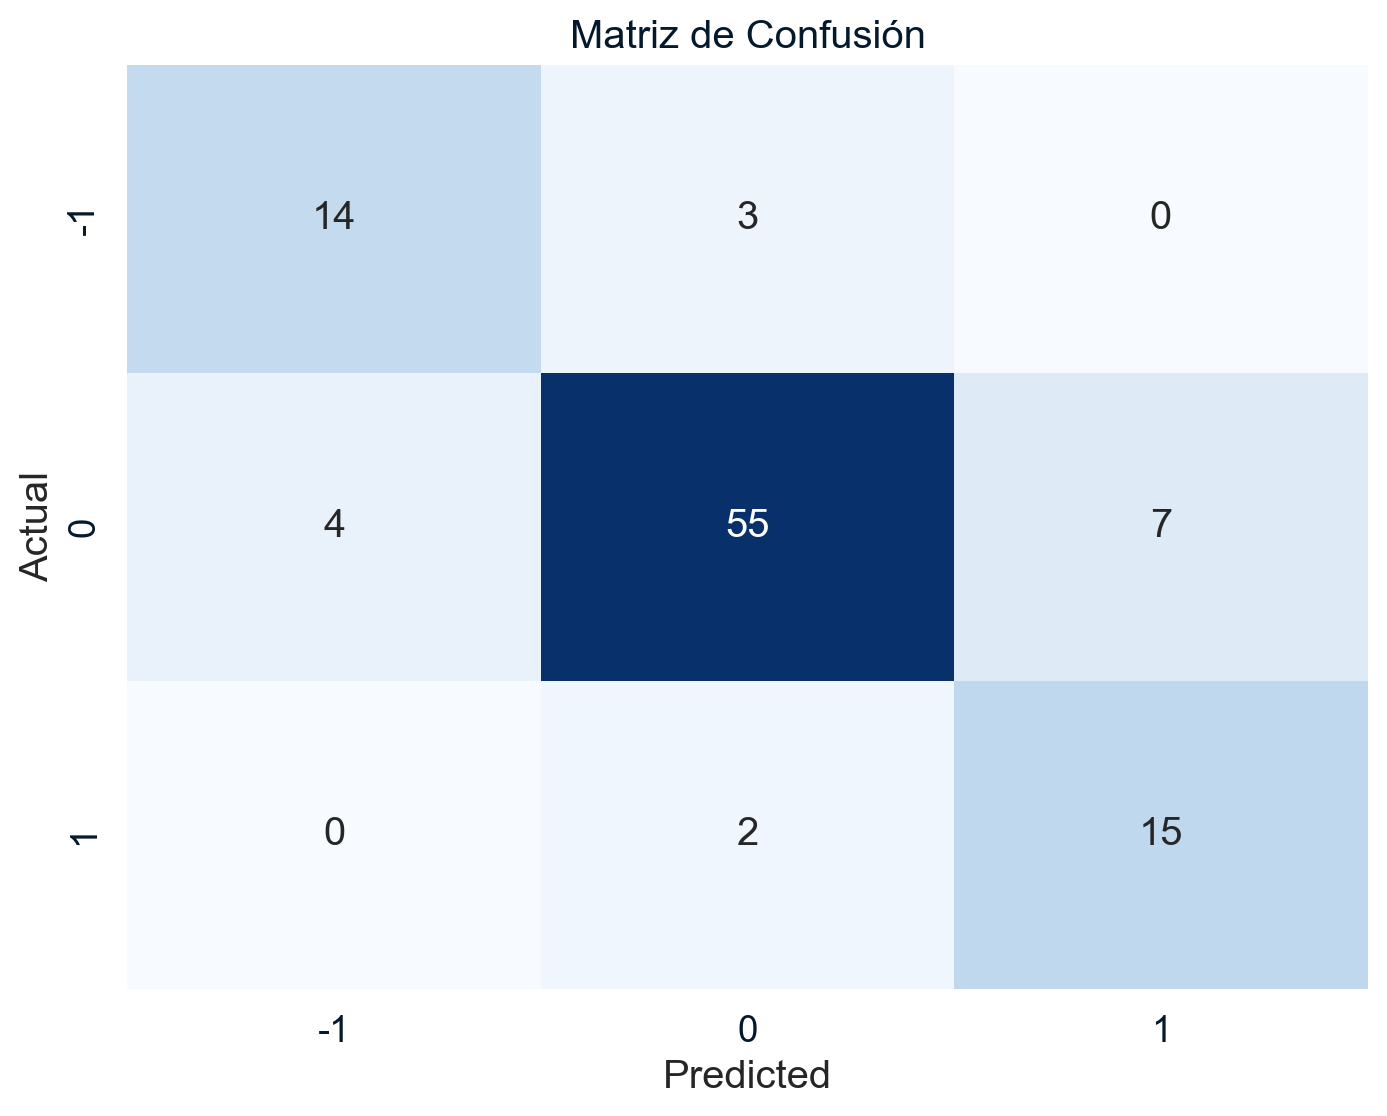

In [31]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['-1', '0', '1'],
            yticklabels=['-1', '0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


Efectividad general del modelo con margen de mejora: El modelo muestra un desempeño generalmente efectivo, con una precisión decente en la clasificación de las clases extremas, "vender" (-1) y "comprar" (1). El modelo tiende a clasificar correctamente la mayoría de las instancias de estas clases, lo que sugiere que es capaz de identificar de forma bastante precisa cuándo es adecuado realizar una transacción. Permitiendo a los inversores aprovechar oportunidades de compra y venta basadas en las condiciones del mercado.

En la matriz de confusión, la clase "mantener" (0) muestra un rendimiento sólido con 55 instancias clasificadas correctamente de un total de 60 instancias verdaderas de esta clase. Esto significa que el modelo tiene una alta precisión en la predicción de situaciones donde mantener una posición es la estrategia más adecuada, lo que puede ayudar a los inversores a tomar decisiones informadas y minimizar la toma de decisiones incorrectas que podrían resultar en pérdidas financieras.

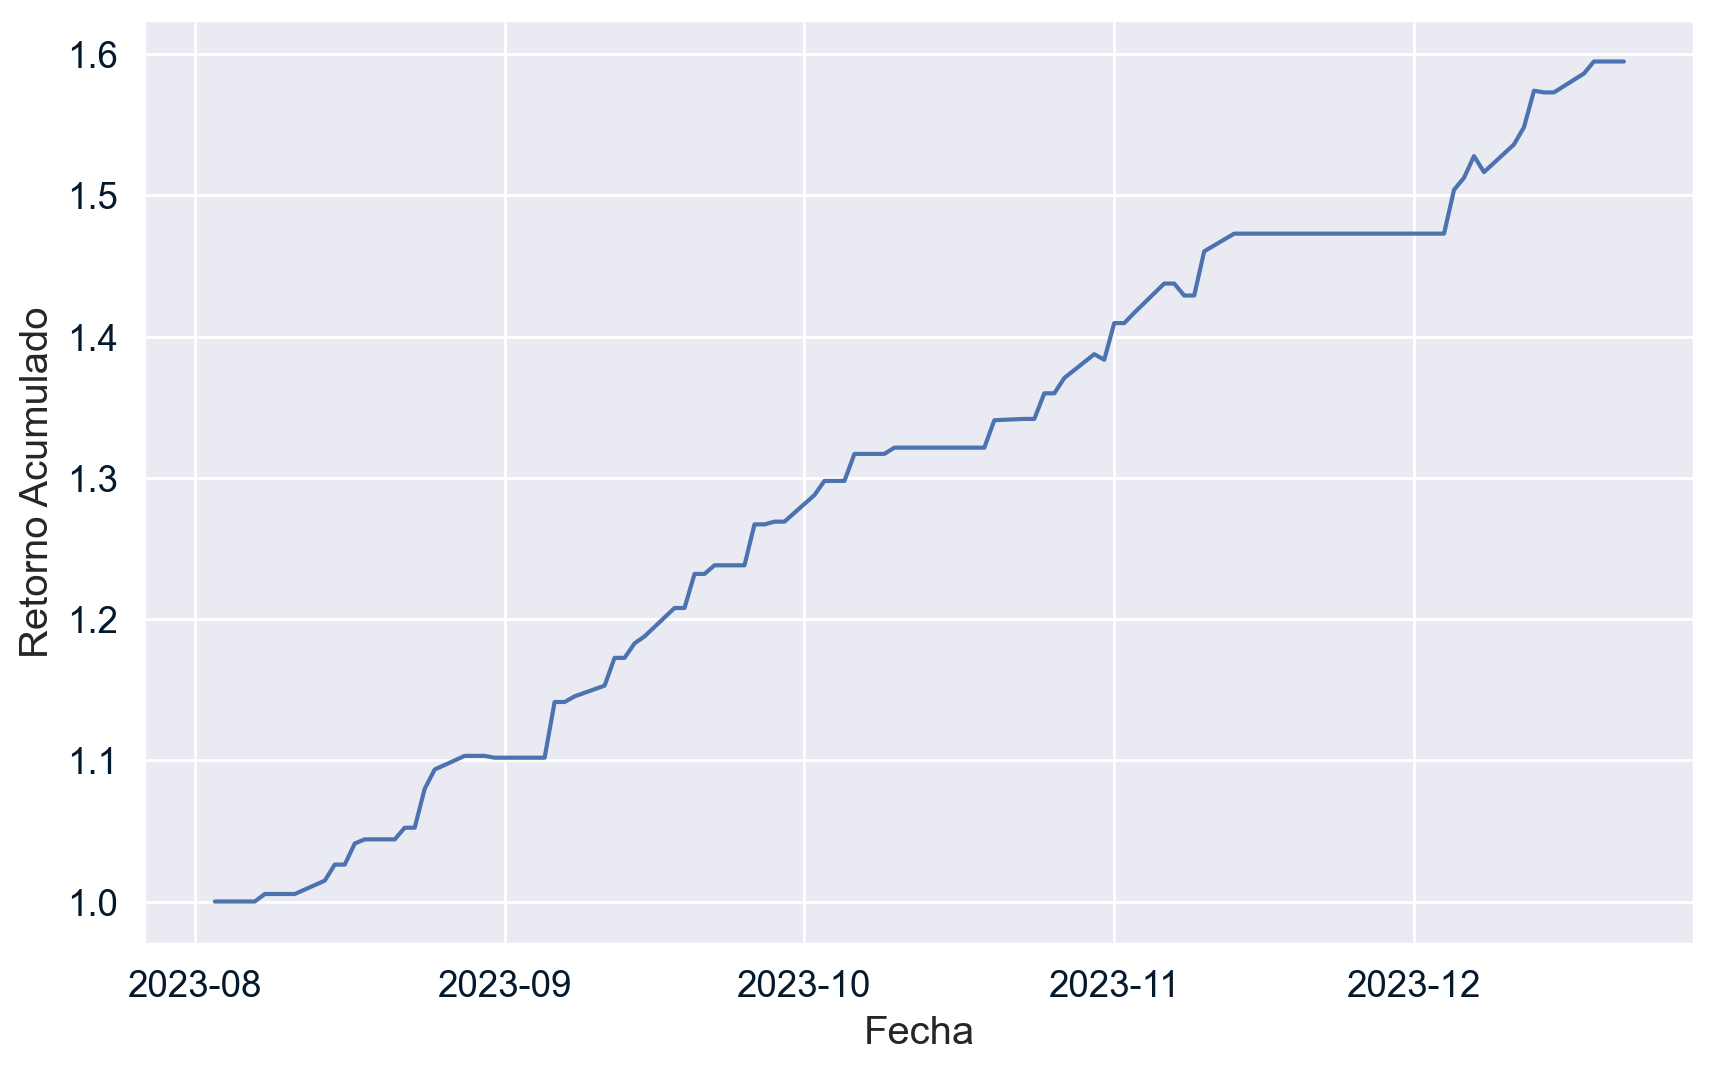

In [32]:
# Calcula los retornos acumulados a partir de los retornos diarios generados por el algoritmo de trading
# a partir de la fecha '2023-08-03' hasta el final del conjunto de datos, y luego traza el gráfico
# de los retornos acumulados a lo largo del tiempo.
cumulative_returns = data["Retorno_acumulado"] = (data.loc['2023-08-03':,"Retorno_rt"] + 1).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns)
plt.xlabel("Fecha")
plt.ylabel("Retorno Acumulado")
plt.grid(True)
plt.show()

1. El crecimiento exponencial de 1 dólar a 1,62 dólares desde agosto hasta diciembre, combinado con Random Forest y MACD, sugiere una fuerte tendencia alcista y oportunidades de inversión. Random Forest puede ayudar a identificar puntos de inflexión, mientras que el MACD confirma el impulso o advierte sobre reversiones. El trader debe aprovechar la tendencia, pero manejar el riesgo con estrategias como órdenes de comprar, mantener o `vender.`

In [33]:
# Calcula el retorno acumulado generado por el modelo de trading hasta la última fecha disponible
# en los datos seleccionados. Luego imprime el retorno de la estrategia como un porcentaje.
retorno_modelo = selected_data.iloc[-1, -1]

print("El retorno de mi estrategia es: " + str( ( retorno_modelo-1) * 100) + "%" )

El retorno de mi estrategia es: 59.46919666044257%


In [34]:
# Obtener los valores únicos y sus conteos
unique_values, counts = np.unique(y_pred_test, return_counts=True)

# Mostrar los valores únicos y sus conteos
for value, count in zip(unique_values, counts):
    print(f"Valor: {value}, Cantidad: {count}")


Valor: -1, Cantidad: 18
Valor: 0, Cantidad: 60
Valor: 1, Cantidad: 22


In [35]:
#Calcular el recall_score
recall_score(y_test, y_pred_test, average='macro')

0.8464052287581699

* El recall_score obtenido en el conjunto de prueba es aproximadamente 0.846, lo que indica que el modelo tiene un buen rendimiento en términos de sensibilidad para todas las clases. Esto significa que el modelo es capaz de identificar correctamente la mayoría de las instancias positivas en el conjunto de prueba, lo cual es fundamental para un modelo de predicción en el contexto del trading, donde identificar oportunidades de compra o venta de manera precisa es crucial. 

In [36]:
#calcular la presicion 
precision_score(y_test, y_pred_test, average='macro')

0.7920875420875421

* El puntaje de precisión obtenido en el conjunto de prueba es aproximadamente 0.792, lo que indica que el modelo tiene un rendimiento sólido en términos de precisión para todas las clases. Esto significa que la mayoría de las instancias clasificadas como positivas por el modelo son realmente positivas. Una alta precisión es importante en un modelo de predicción para el trading, ya que ayuda a evitar falsas señales de compra o venta, lo que podría resultar en pérdidas financieras.

In [37]:

#calcular el f1_score 
f1 = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.8429597069597069


* El puntaje F1 obtenido en el conjunto de prueba es aproximadamente 0.842. El puntaje F1 es una medida que combina precisión y recall en un solo número, lo que lo hace útil para evaluar el rendimiento general de un modelo de clasificación. Un valor alto de F1 indica un buen equilibrio entre precisión y recall. En este caso, el valor de F1 es bastante alto, lo que sugiere que el modelo tiene un buen rendimiento en términos de clasificación de las diferentes clases en el conjunto de prueba.

In [38]:
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud:", accuracy)

# Calcular el Índice Kappa de Cohen
kappa = cohen_kappa_score(y_test, y_pred_test)
print("Índice Kappa de Cohen:", kappa)


Exactitud: 0.84
Índice Kappa de Cohen: 0.7014925373134329


* La exactitud del modelo en el conjunto de prueba es del 84%, lo que indica que el 84% de las predicciones fueron correctas. Por otro lado, el Índice Kappa de Cohen es una medida que evalúa la concordancia entre las predicciones del modelo y las clases reales, corrigiendo la posibilidad de aciertos al azar. En este caso, el Índice Kappa de Cohen es de aproximadamente 0.701, lo que sugiere una concordancia sustancial entre las predicciones y las clases reales. Ambos valores indican un buen rendimiento del modelo.

In [39]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Exactitud:", accuracy)


Exactitud: 0.84



* La exactitud del modelo es del 84%, lo que significa que aproximadamente el 84% de las predicciones realizadas por el modelo son correctas. Una alta exactitud indica que el modelo está realizando predicciones precisas en general. Sin embargo, la exactitud por sí sola puede no ser suficiente para evaluar completamente el rendimiento del modelo, especialmente en conjuntos de datos desequilibrados o con diferentes costos asociados a los errores de clasificación

In [40]:
# Define la función para mapear las clases [-1, 0, 1] a [0, 1, 2]
def map_classes(y):
    # Crea un array de ceros con la misma forma que y
    y_mapped = np.zeros_like(y)
    # Mapea las clases -1 a 0
    y_mapped[y == -1] = 0
    # Mapea las clases 0 a 1
    y_mapped[y == 0] = 1
    # Mapea las clases 1 a 2
    y_mapped[y == 1] = 2
    return y_mapped

# Crea una instancia de FunctionTransformer para mapear las clases
class_mapper = FunctionTransformer(map_classes)

# Define el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    'xgb_model__max_depth': [3, 4, 5],  # Define los valores de profundidad máxima
    'xgb_model__learning_rate': [],  # Define los valores de tasa de aprendizaje
    'xgb_model__n_estimators': [],  # Define los valores de número de estimadores
}

# Crea una pipeline con la transformación de clase y el clasificador XGBoost
pipeline = Pipeline([
    ('class_mapper', class_mapper),  # Aplica la transformación de clase
    ('xgb_model', xgb_model)  # Utiliza el clasificador XGBoost
])

# Crea una instancia de GridSearchCV con la pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrena el modelo
grid_search.fit(X_train, map_classes(y_train))  # Aplica el mapeo de clases a las etiquetas de entrenamiento antes de entrenar

# Obtiene los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'xgb_model__learning_rate': 0.1, 'xgb_model__max_depth': 3, 'xgb_model__n_estimators': 100}


El grid_search nos ayuda a identificar cuales son los mejores hiperparámetros para no sobreajustar el modelo partiendo de la búsqueda de cuales son los mejores hiperparámetros en el siguiente código: 
param_grid = {
    'xgb_model__max_depth': [3, 4, 5],  # Define los valores de profundidad máxima
    'xgb_model__learning_rate': [0.1, 0.01, 0.05],  # Define los valores de tasa de aprendizaje
    'xgb_model__n_estimators': [100, 200, 300],  # Define los valores de número de estimadores
}

Allí se puede evidenciar que el grid_search evalúa consecuentemente la profundidad de los árboles del modelo evalúandolos en 3, 4 y después 5; Lo mismo hace para la tasa de aprendizaje evaluada en 0.1, 0.01, 0.05; y por último el número de estimadores variando consecuentemente entre 100, 200, 300. En la búsqueda de los mejores hiperparámeros, dió como resultado que los mejores hiperparámetros encontrados son: {'xgb_model__learning_rate': 0.1, 'xgb_model__max_depth': 3, 'xgb_model__n_estimators': 100}. Obteniendo finalmente una recomendación que resultó efectiva para evitar el sobre ajuste del modelo.  

# Conclusiones y Hallazgos:

* La estrategia de trading implementada, basada en el indicador MACD y sus señales de compra y venta, demostró ser efectiva al lograr un rendimiento acumulado del 59.46%. Esto sugiere que el modelo pudo identificar oportunidades rentables de compra y venta en el mercado de acciones de Apple.

* La selección de características relevantes, como la línea MACD, la línea de señal, el histograma MACD y el cambio en el histograma, fue crucial para el éxito de la estrategia. Estas características proporcionaron información valiosa sobre las tendencias y los cambios en el mercado, permitiendo decisiones de trading más informadas.

*  El modelo de clasificación Random Forest utilizado para predecir las señales de compra y venta mostró una alta precisión en el conjunto de entrenamiento (83%) y una precisión sólida en el conjunto de prueba (87%). Esto sugiere que el modelo fue capaz de generalizar bien a datos no vistos, lo cual es fundamental en aplicaciones de trading.

*  Este proyecto proporcionó una excelente oportunidad para aprender sobre el uso de herramientas como scikit-learn para implementar estrategias de trading automatizadas. También resaltó la importancia de la investigación y el análisis detallado de los resultados para mejorar continuamente las estrategias de trading.

*  La combinación de la estrategia MACD con técnicas de machine learning, específicamente el modelo de Random Forest, ha demostrado ser efectiva para predecir movimientos futuros en el precio de las acciones de Apple Inc. (AAPL). Esta combinación aprovecha la robustez del análisis técnico y la capacidad predictiva de los modelos de machine learning para tomar decisiones informadas en el mercado de valores.

* Al utilizar el MACD como característica clave para el modelo de Random Forest, se han obtenido señales claras sobre cuándo comprar, vender o mantener activos. Esto puede mejorar significativamente la eficacia de las decisiones de trading al centrarse en los puntos de inflexión clave del mercado.

* El MACD se ha demostrado útil como indicador de momentum, proporcionando señales sobre la dirección y la fuerza de la tendencia del precio de las acciones. Su capacidad para identificar cambios en el impulso del precio es fundamental para la generación de señales de trading precisas.

* El modelo de Random Forest entrenado ha mostrado un alto nivel de precisión y sensibilidad tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto indica que el modelo es capaz de generalizar bien a datos no vistos y de predecir con precisión las señales de compra, venta o mantener.
* Por medio del Grid_search pudimos evidencias que teníamos el modelo sobreajustado, dandole una profundidad ilimitada  a los árboles de decisión, gracias a esta herramienta pudimos evidenciar la falta del parámetro max_depth para limitar la profundidad de los árboles de decisión evitando que el modelo quedara muy sobre ajustado.